# Monte Carlo para hallar integrales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [2]:
def funcion(x):
  return np.exp(x)*np.cos(x)

def funcion2(x):
  return np.cos(x)

def integral_funcion(x):
  return np.exp(x)*(np.cos(x)+np.sin(x))/2

def integral_funcion2(x):
  return np.sin(x)

In [ ]:
a = 0
b = np.pi/2
N = 400

puntos_x = np.random.uniform(a, b, N)
puntos_y = funcion2(puntos_x)

valor_promedio = np.mean(puntos_y)

# Integral montecarlo
integral_MC = (b - a) * valor_promedio
integral_exacta = integral_funcion2(b) - integral_funcion2(a)
print(f'integral MC = {integral_MC:.5f}')
print(f'integral exacta = {integral_exacta:.5f}')
print(f'error MC = {np.abs(integral_MC - integral_exacta):.5e}')

integral MC = 0.99829
integral exacta = 1.00000
error MC = 1.71063e-03


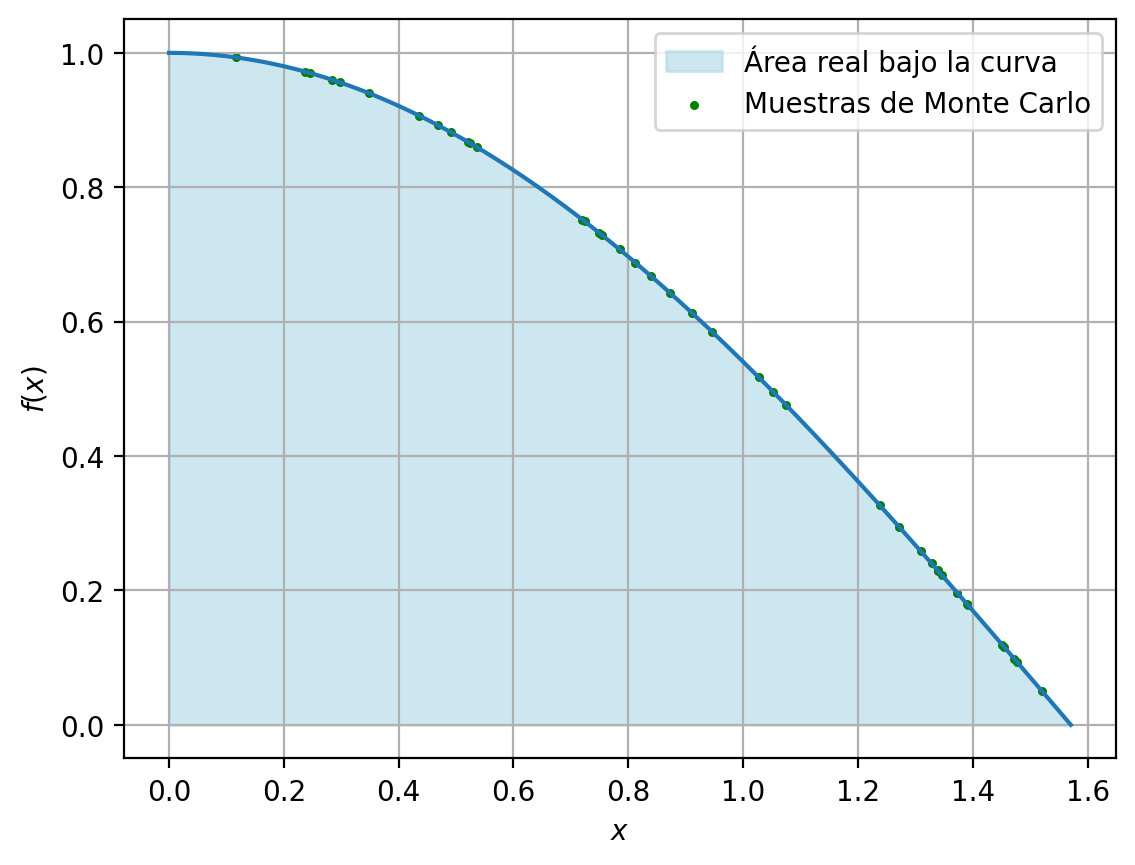

In [ ]:
x_plot = np.linspace(a, b, 400)
y_plot = funcion2(x_plot)

plt.figure()
plt.plot(x_plot, y_plot)
plt.fill_between(x_plot, y_plot, color='lightblue', alpha=0.6, label='Área real bajo la curva')
plt.scatter(puntos_x[::10], puntos_y[::10], color='green', s=5, label='Muestras de Monte Carlo')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Muestreo por transformacion inversa

$$ \int_a^b f(x)dx = \int_a^b w(x) \frac{f(x)}{w(x)}dx $$
$w$ es la pdf (probability density function) funcion de densidad de probabilidad, y
$u$ es la cdf (cumulative distribution function) funcion de distribucion acumulada
$$ u(x) = \int_0^{x} w(\tilde{x})d\tilde{x} $$

In [ ]:
def pdf(x, b):
  """ probability density function """
  return 2 * (1 - x / b)

def cdf(x, b):
  """ cumulative distribution function """
  return 2*x - x**2/b

def inversa_cdf(u, b):
    return b  * (1 - np.sqrt(1 - u))

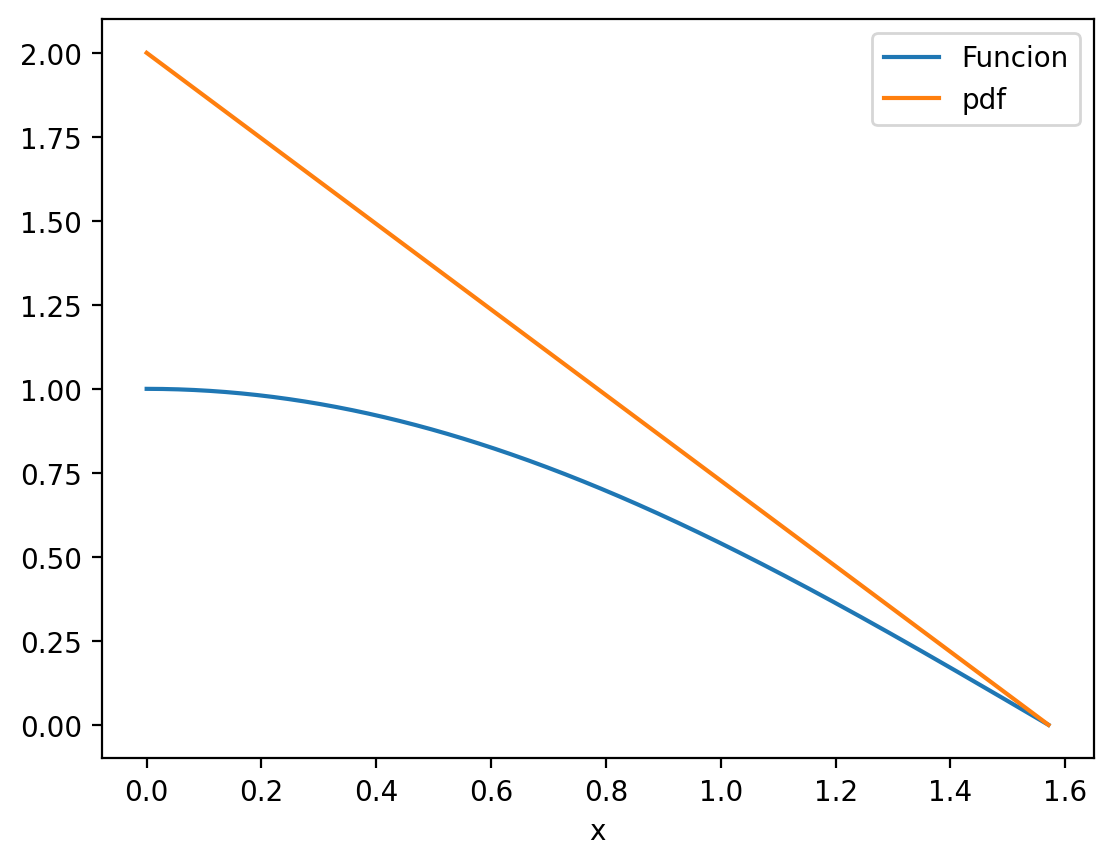

In [ ]:
pdf_plot = pdf(x_plot, b)

plt.plot(x_plot, y_plot, label='Funcion')
plt.plot(x_plot, pdf_plot, label='pdf')
plt.xlabel('x')
plt.legend()
plt.show()

Comprobar que la cdf tiene la normalizacion correcta

In [ ]:
cdf(b,b)-np.pi/2

0.0

In [ ]:
np.random.seed(30)
u_samples = np.random.uniform(0, 1, N)
x_samples = inversa_cdf(u_samples, b)

f_x = funcion2(x_samples)
w_x = pdf(x_samples, b)


integral_MCw = (b-a)*np.mean(f_x / w_x)

print(f'integral MC w = {integral_MCw:.5f}')
print(f'integral exacta = {integral_exacta:.5f}')
print(f'error MC w = {np.abs(integral_MCw - integral_exacta):.5e}')

integral MC w = 0.99693
integral exacta = 1.00000
error MC w = 3.07274e-03


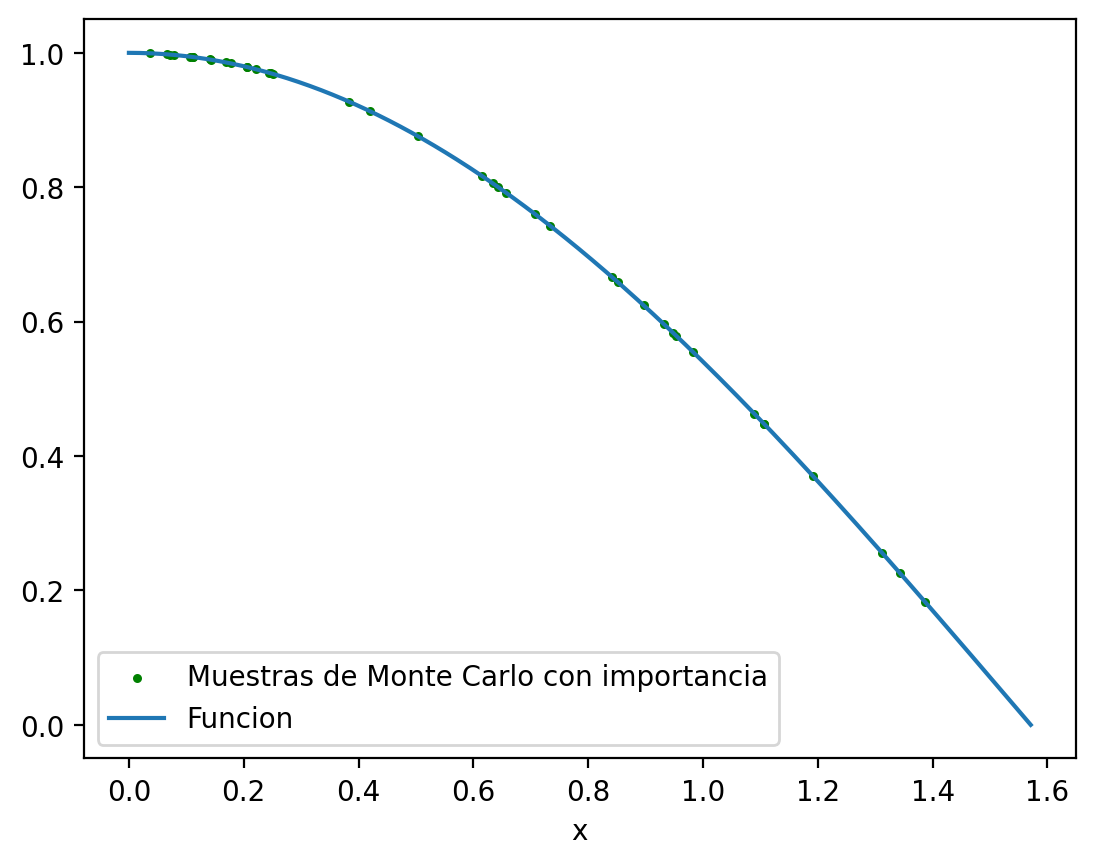

In [ ]:
plt.scatter(x_samples[::10], f_x[::10], color='green', s=5, label='Muestras de Monte Carlo con importancia')
plt.plot(x_plot, y_plot, label='Funcion')
plt.xlabel('x')
plt.legend()
plt.show()

Ahora comprobamos que la variable x esta distribuida como se requirio

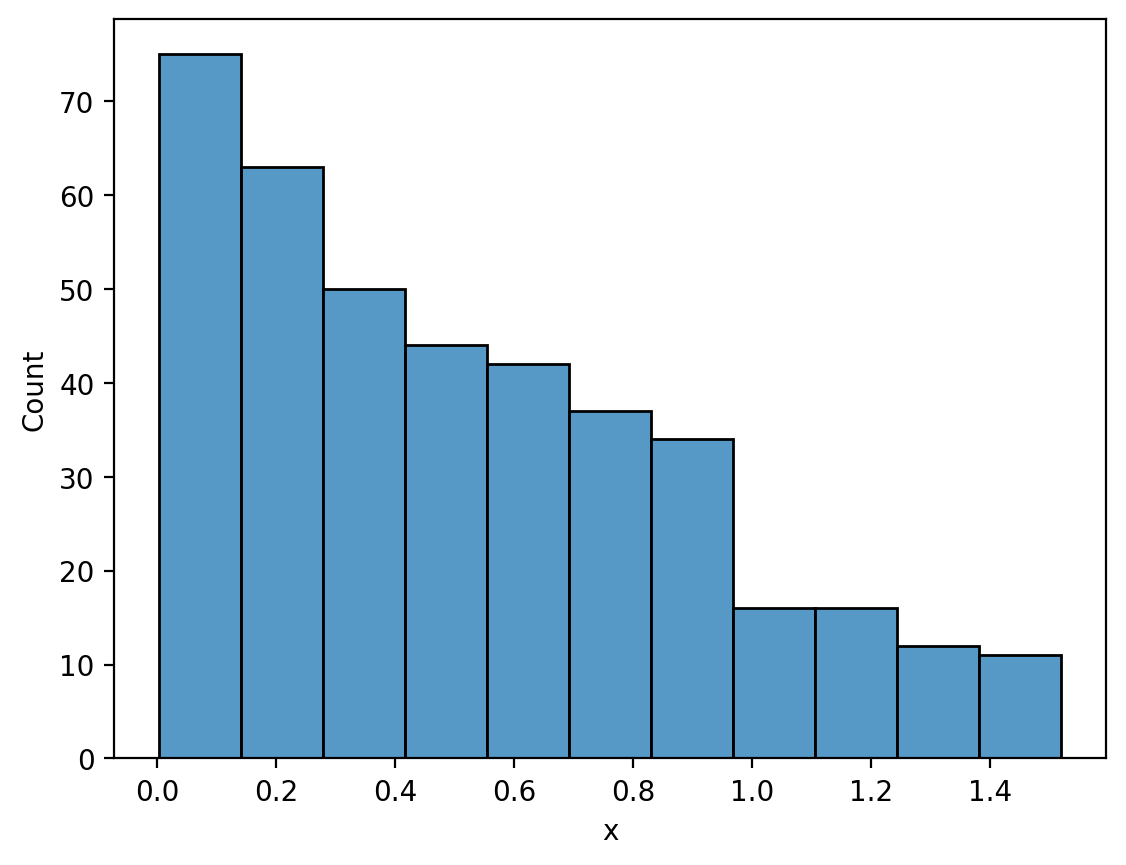

In [ ]:
sns.histplot(x_samples)
plt.xlabel('x')
plt.show()